In [638]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


In [639]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [640]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cardeza, Mr. Thomas Drake Martinez",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [641]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Name

We don't name as we already have passenger id which can be used, so we are dropping the name.

In [642]:
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

In [643]:
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)

## Sex

Lets Check if their are some missing values in sex.

In [644]:
train['Sex'].isnull().sum()

0

Since no value is missng we can now convert sex into a binary female:0,male:1

In [645]:
train['Sex']=train['Sex'].map({'female':0,'male':1})
test['Sex']=test['Sex'].map({'female':0,'male':1})


## Age

Lets's check whether survival is dependent upon age.

In [646]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

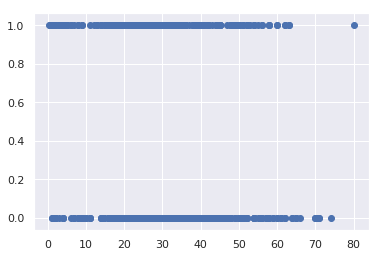

In [647]:
plt.scatter(train['Age'],train['Survived'])

The graph shows that their is no direct relation that age is effecting the survival.But we will see later that if it matters or not.

In [648]:
train['Age'].isnull().sum()

177

In [649]:
test['Age'].isnull().sum()

86

Their are 177 values in training and 86 values in testing data replacing these values with 0

In [650]:
train['Age'] = train['Age'].replace('nan', np.nan).fillna(0)

In [651]:
test['Age'] = test['Age'].replace('nan', np.nan).fillna(0)

## Dropping Ticket

In [652]:
train=train.drop(['Ticket','Cabin','Embarked'],axis=1)
test=test.drop(['Ticket','Cabin','Embarked'],axis=1)


# Studying the finally left data

In [653]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
6,0,3,1,0.0,0,0,8.4583
7,0,1,1,54.0,0,0,51.8625
8,0,3,1,2.0,3,1,21.0750
9,1,3,0,27.0,0,2,11.1333


Since age can lead to changed results we need to scale it down

In [654]:
# import some preprocessing module
from sklearn import preprocessing

#scale the data for better results
age_scaled = preprocessing.scale(train['Age'])
age_scaled

array([-0.10, 0.81, 0.13, 0.64, 0.64, -1.35, 1.72, -1.24, 0.18, -0.56,
       -1.13, 1.94, -0.22, 0.86, -0.56, 1.77, -1.24, -1.35, 0.41, -1.35,
       0.64, 0.58, -0.50, 0.24, -0.90, 0.81, -1.35, -0.27, -1.35, -1.35,
       0.92, -1.35, -1.35, 2.40, 0.24, 1.03, -1.35, -0.16, -0.33, -0.56,
       0.92, 0.18, -1.35, -1.18, -0.27, -1.35, -1.35, -1.35, -1.35, -0.33,
       -0.96, -0.16, 1.43, 0.30, 2.34, -1.35, -0.16, 0.27, -1.07, -0.73,
       -0.10, 0.81, 1.21, -1.13, -1.35, -1.35, 0.30, -0.27, -0.39, 0.13,
       0.47, -0.44, -0.16, 0.13, 0.47, 0.07, -1.35, -1.35, -1.31, 0.35,
       -0.10, 0.30, -1.35, 0.24, -0.39, 0.52, -0.44, -1.35, -0.05, 0.01,
       0.30, -0.22, 1.26, 0.13, 2.00, -1.35, 2.68, -0.05, 0.58, 0.58,
       0.24, -1.35, -0.16, 0.52, 0.75, 0.24, -0.16, -1.35, 0.81, -1.35,
       1.32, -0.53, -0.10, -0.22, -0.39, -0.16, 2.66, 0.30, 0.01, -1.24,
       -0.16, -1.35, 0.49, 0.49, 1.72, -0.67, -1.35, 0.01, -1.35, 1.21,
       0.52, -0.22, 1.32, 0.30, 0.07, -0.05, -0.27, 0.75,

In [655]:
train['Age_Scaled']=age_scaled

In [656]:
fare_scaled=preprocessing.scale(train['Fare'])
train['Fare_Scaled']=fare_scaled

In [657]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
age_scaled1 = preprocessing.scale(test['Age'])
age_scaled1

array([0.59, 1.31, 2.16, 0.17, -0.12, -0.57, 0.34, 0.11, -0.34, -0.17,
       -1.37, 1.25, -0.06, 2.22, 1.31, -0.00, 0.62, -0.17, 0.17, 1.19,
       1.76, -0.86, -1.37, -0.17, 1.36, 1.48, -0.12, -0.09, 0.96, -1.37,
       1.48, -0.00, 0.51, -1.37, 0.34, -0.32, -1.37, -0.17, 0.05, -1.37,
       0.85, -1.37, 0.96, 0.34, 1.19, 0.05, 1.19, -1.37, 2.05, 0.68,
       -0.00, 0.17, -0.23, 0.23, -1.37, -0.80, 0.62, 0.05, -1.37, 0.68,
       -0.40, 0.45, -0.34, -0.12, -0.63, -1.37, -0.34, 1.31, 0.40, 2.05,
       -0.00, -0.17, 0.28, 0.25, 0.62, 0.48, -1.37, 1.76, 0.34, -0.00,
       -1.03, 2.44, 1.42, -1.37, -1.37, -1.37, 0.17, -0.34, -1.37, -1.25,
       -0.12, -1.37, 0.17, -1.37, 0.05, 0.05, 2.96, 0.28, -0.23, 0.51,
       1.08, 0.17, -1.37, 0.11, -0.46, 0.23, -0.17, -1.37, -1.37, -0.32,
       0.96, -1.37, 0.68, -0.32, 2.22, -0.34, -1.37, -1.31, 0.68, 0.28,
       -0.69, -1.37, 0.62, 0.23, -1.37, -0.40, -0.12, -1.37, 1.02, -0.00,
       0.45, 1.65, -1.37, -1.37, 1.08, -0.00, 0.14, 0.11, -0.06

In [658]:
test['Age_Scaled']=age_scaled1

In [659]:
fare_scaled1=preprocessing.scale(test['Fare'])
test['Fare_Scaled']=fare_scaled1

In [660]:
train=train.drop(['Age','Parch','Fare'],axis=1)
test=test.drop(['Age','Fare','Parch'],axis=1)

In [661]:
train

,Survived,Pclass,Sex,SibSp,Age_Scaled,Fare_Scaled
PassengerId,,,,,,
1,0,3,1,1,-0.102313,-0.502445
2,1,1,0,1,0.807492,0.786845
3,1,3,0,0,0.125138,-0.488854
4,1,1,0,1,0.636903,0.420730
5,0,3,1,0,0.636903,-0.486337
6,0,3,1,0,-1.353294,-0.478116
7,0,1,1,0,1.717296,0.395814
8,0,3,1,3,-1.239568,-0.224083
9,1,3,0,0,0.182001,-0.424256


In [662]:
import statsmodels.api as sm

In [663]:
x1=train.drop(['Survived'],axis=1)
y=train['Survived']

In [664]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.452423
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 May 2019   Pseudo R-squ.:                  0.3206
Time:                        12:21:01   Log-Likelihood:                -403.11
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.873e-80
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.5959      0.359     10.009      0.000       2.892       4.300
Pclass         -1.0005      0.136     -7.384      0.000      -1.266      -0.735
Sex            -2.7284      0.192    -14.220      0.000      -3.104      -2.352
SibSp          -0.3082      0.097     -3.162      0.002      -0.499      -0.117
Age_Scaled     -0.3123      0.095     -3.295      0.001      -0.498      -0.127
Fare_Scaled     0.1373      0.111      1.235      0.217      -0.081       0.355
===============================================================================
"""

In [665]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [666]:
confusion_matrix(x,y,results_log)

(array([[463.00, 86.00],
        [102.00, 240.00]]), 0.7890011223344556)

In [667]:
test_data=test
test_data = sm.add_constant(test_data)
test_data

,const,Pclass,Sex,SibSp,Age_Scaled,Fare_Scaled
PassengerId,,,,,,
892,1.0,3,1,0,0.594801,-0.497811
893,1.0,3,0,1,1.305896,-0.512660
894,1.0,2,1,0,2.159209,-0.464532
895,1.0,3,1,0,0.168145,-0.482888
896,1.0,3,0,1,-0.116293,-0.417971
897,1.0,3,1,0,-0.571393,-0.472814
898,1.0,3,0,0,0.338807,-0.501392
899,1.0,2,1,1,0.111257,-0.118681
900,1.0,3,0,0,-0.343843,-0.508555


In [668]:
result=results_log.predict(test_data)
result
result_final=[]
for i in result:
    if i>=0.5:
        result_final.append(1)
    else:
        result_final.append(0)
        
result_final
        
    


[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [669]:
results=pd.DataFrame(result_final,columns=['Result Survived'])

In [670]:
results

,Result Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [671]:
results.to_csv('results.csv')

In [672]:
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='results.csv')